In [1]:
import os.path as path
import sys
import numpy as np
from pyspark import SparkContext, SparkConf
from lib import *
from pyspark.sql import *
# from utils import *
from utils import *
import findspark
findspark.init()

%pylab inline


Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Rectangle', 'mean', 'Polygon', 'Circle', 'plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# Create a new spark and sql context
sc = create_sc(pyFiles=['lib/numpy_pack.py','lib/spark_PCA.py','lib/computeStatistics.py'])
sqlContext = SQLContext(sc)

# Create the names of the files/directories we're working with
data_dir = '../DataHW3'

if not path.exists(data_dir + '/' + 'stations.parquet'):
    getStations()

    
states = ['ND', 'SD', 'MN', 'IA', 'NE', 'TX', 'OK', 'KS']

for s in states:
    
    parquet = s + '.parquet'
    tarname = s + '.tgz'
    
    if not path.exists(data_dir + '/' + parquet):

        # pull the weather data for a particular state from the MAS-DSE S3 bucket
        getStateData(s, data_dir, tarname, parquet)

dict_items([('spark.app.name', 'Weather_PCA'), ('spark.executor.memory', '3g'), ('spark.executor.cores', '1'), ('spark.cores.max', '4'), ('spark.default.parallelism', '10'), ('spark.logConf', 'True')])


# Change in average daily snow fall

In [3]:
featureStr = "\'SNOW\'"

test_data = decadeMeasurementDelta(featureStr, states, data_dir, sqlContext)
master_dataframe = test_data[0]
for i in range(len(test_data)-1):
    master_dataframe = master_dataframe.union(test_data[i+1])

print("\n\nAmount of snow fall change, 70s to 00s")

plotter = leaflet(sqlContext, featureStr)
plotter.add(master_dataframe)
plotter.plot_all()
plotter.m


/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


Done adding ND
Done adding SD
Done adding MN
Done adding IA
Done adding NE
Done adding TX
Done adding OK
Done adding KS


Amount of snow fall change, 70s to 00s


Map(center=[37.45725059509277, -98.1441535949707], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Legend:

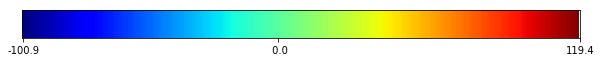

In [4]:
plotter.color_legend()

# Change in average daily snow depth

In [5]:
featureStr = "\'SNWD\'"

test_data = decadeMeasurementDelta(featureStr, states, data_dir, sqlContext)
master_dataframe = test_data[0]
for i in range(len(test_data)-1):
    master_dataframe = master_dataframe.union(test_data[i+1])

print("\n\nChange in snow depth change, 70s to 00s")

plotter = leaflet(sqlContext, featureStr)
plotter.add(master_dataframe)
plotter.plot_all()
plotter.m

/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


Done adding ND
Done adding SD
Done adding MN
Done adding IA
Done adding NE
Done adding TX
Done adding OK
Done adding KS


Change in snow depth change, 70s to 00s


Map(center=[37.45725059509277, -98.1441535949707], controls=(ZoomControl(options=['position', 'zoom_in_text', …

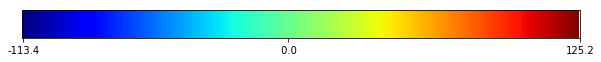

In [6]:
plotter.color_legend()

# Change in average max daily temperature

In [7]:
featureStr = "\'TMAX\'"

test_data = decadeMeasurementDelta(featureStr, states, data_dir, sqlContext)
master_dataframe = test_data[0]
for i in range(len(test_data)-1):
    master_dataframe = master_dataframe.union(test_data[i+1])

print("\n\nChange in average max daily temperature, 70s to 00s")

plotter = leaflet(sqlContext, featureStr)
plotter.add(master_dataframe)
plotter.plot_all()
plotter.m

/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


Done adding ND
Done adding SD
Done adding MN
Done adding IA
Done adding NE
Done adding TX
Done adding OK
Done adding KS


Change in average max daily temperature, 70s to 00s


Map(center=[37.45725059509277, -98.1441535949707], controls=(ZoomControl(options=['position', 'zoom_in_text', …

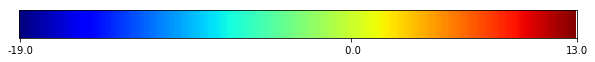

In [8]:
plotter.color_legend()

# Change in average min daily temperature

In [10]:
featureStr = "\'TMIN\'"

test_data = decadeMeasurementDelta(featureStr, states, data_dir, sqlContext)
master_dataframe = test_data[0]
for i in range(len(test_data)-1):
    master_dataframe = master_dataframe.union(test_data[i+1])

print("\n\nChange in average min daily temperature, 70s to 00s")

plotter = leaflet(sqlContext, featureStr)
plotter.add(master_dataframe)
plotter.plot_all()
plotter.m

/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


Done adding ND
Done adding SD
Done adding MN
Done adding IA
Done adding NE
Done adding TX
Done adding OK
Done adding KS


Change in average min daily temperature, 70s to 00s


Map(center=[37.45725059509277, -98.1441535949707], controls=(ZoomControl(options=['position', 'zoom_in_text', …

Legend:

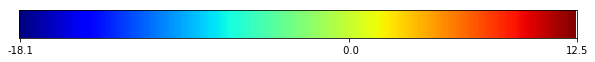

In [33]:
plotter.color_legend()

# Verification of 'TX' values

Verification that the SNOW and SNWD metrics actually saw an average increase comparing across the two time periods

In [24]:
featureStr = "\'SNWD\'"

In [25]:
data_dir = '../DataHW3'
s = 'TX'
parquet = s + '.parquet'
parquet_path = data_dir + '/' + parquet
df = sqlContext.read.parquet(parquet_path)
sqlContext.registerDataFrameAsTable(df,f'table_{s}')

# 70s

###
Query = f"""
SELECT Station, Measurement, Values, longitude, latitude, Year
FROM table_{s}
WHERE Measurement=={featureStr} and (Year >= 1970 and Year < 1980)
"""
query70s = sqlContext.sql(Query)
rdd70s = query70s.rdd.map(lambda x: remove0sAndAverage(x, 'Values'))
dfs70 = sqlContext.createDataFrame(rdd70s)
sqlContext.registerDataFrameAsTable(dfs70, f'table_{s}_70s')


/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [26]:
df70 = dfs70.toPandas()

In [27]:
# 00s

###
Query = f"""
SELECT Station, Measurement, Values, longitude, latitude, Year
FROM table_{s}
WHERE Measurement=={featureStr} and (Year >= 2000 and Year < 2010)
"""
query00s = sqlContext.sql(Query)
rdd00s = query00s.rdd.map(lambda x: remove0sAndAverage(x, 'Values'))
dfs00 = sqlContext.createDataFrame(rdd00s)
sqlContext.registerDataFrameAsTable(dfs00, f'table_{s}_00s')


/usr/local/spark/python/pyspark/sql/session.py:360: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [28]:
df00 = dfs00.toPandas()

In [35]:
print("Mean TX SNOW values in the 70s: %s"%df70.Values.mean())
print("Mean TX SNOW values in the 00s: %s"%df00.Values.mean())

Mean TX SNOW values in the 70s: 60.98990858848359
Mean TX SNOW values in the 00s: 73.82697287302597
